# Lesson 15 Classification

Using the Breast Cancer data set (available in Sklearn lib), we can build an ML model to predict if cancer is malignant or benign.


Looking at this dataset, we can see there are many factors being recorded and the outcome is a binary malignant or bening yes-no variable. Thses features are from a digitized image of cell nuclei.  

**<mark>EDA: Data balance</mark>**  
you should keep track of the balance between the outcome data ie how many samples you have of malignant versus bening outcomes. It would not be a good data set if it was heavily skewed with 99% malignant and 1% benign, for example. 

**<mark>Missing Values</mark>**  
Check them. I see there are non in this case.

**<mark>Train Test Split </mark>**:  
**<mark>Stratifying</mark>** the response data (or any data), during the <mark>train-test-split</mark> keeps ratio of data in the resulting split the same. Ex: 25% yes and 75% no in original data maintains 25% yes and 75% no in each of the splits.  

**<mark> Standardize datatset </mark>**  
We want mean = 0 and sdev = 1.
When applying the scalar, make sure to **retain/reconstruct the indices and columns.** This is especially important so that you can continue to associate the correct X data with the corresponding y outputs.

**<mark> Visualize dataset </mark>**  
We can visualize this high dimensional dataset by using a projection technique. Something like **PCA**, for example, to project to a lower dimensional space. 

We can see there is a decent amount of separation ie when doing PCA. 

**<mark> LDA - Linear Discriminant Analysis Regression Model </mark>**  
We also apply LDA - linear discriminant analysis to solve our problem.  
You can see the weights show us that mean radius, mean perimeter, worst radius, and worst area carry the most weight by a substantial amount.  

<mark> Classification Report </mark> is applied to the LDA model using the **test** data. It gives us all of the information like F1-score, precision, recall etc that appear in the model quality metrics section below. 


# Theory for Linear Discriminant Analysis

LDA tries to model probability $p(y = C_k | X = x)$ assuming:  

- $p(x | C_k)$ is **Gaussian** and therefore we can describe it using parameters:  
$\mu_k$ and $\Sigma_k$.  

- and of course we have identically distributed pdfs $\Sigma_k = \Sigma$.  

Using maximum likelihood analysis to couple with these assumptions, there is a discriminant function:  

$\alpha_k (x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + log(\pi_k)$  

Where $\pi_k$ are the prior probabilities of the classes.  

Consider the inverse of the covariance matrix, producted with the $k-th$ mean:
$$w = \Sigma^{-1} \mu_k$$
$$w_0 = -\frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + log(\pi_k).$$

We can write:
$\alpha_k (x) = x^T w + w_0$


# Model Quality Measures for Machine Learning.

We can look at many ways of measuring model quality.  

For binary problems, there are standard ways of doing this, and they can be generalized to problems with more classes. Instead of {0,1} like in this case, we may have {0, 1, 2, 3, 4, 5} or {"cats", "dogs", "trains", "planes"}    

Topics such as <mark> Confusion Matrix </mark> etc can be thought of in this way.  

- **Positive**: $(p)$ Truly positive sample.
- **Negative**: $(n)$ Truely negative sample.
- **True Positive**: $(vp)$ Sample identified as positive that is truly positive.
- **True Negative**: $(vn)$ Sample identified as negative that is truly negative.
- **False Positive**: $(fp)$ Sample identified as positive that is truly negative.
- **False Negative**: $(fn)$ Sample that is identified as negative that is truly positive.
- **All positive classified**: $(p')$ Sum of $vp + fp$, total samples identified as positive, regardless of true value.
- **True Positive Rate**: $(vp / p)$ Ratio of true positive classifications versus all true positive samples. 
- **False Negative Rate**: $(fn / n)$ Ratio of false negative classifications versus all negative samples.
- **Error**: $(\frac{f_p + f_n}{N})$  Percentage of examples that are incorrectly classified.
- **Accuary**: $(\frac{vp + vn}{N} = \text{1 - error})$. Percentage of examples that are classifed in the correct class. 
- **Precision**: $(\frac{vp}{p'})$. Rate of true positives compared to ALL samples classified as positive. 
- **Recall**: $(\frac{vp}{p})$. Rate of true positives compared to all positive samples.
- **F1-score**: $(2 \frac{ precision \cdot recall}{precision + recall})$. Balance between precision and recall.  
- **ROC (Curve)**: Receiver Ooperating Characteristic Curve represents the rate of true positives against that of false positives for different cut-off points. The AUC (area under the curve) is calculated on this curve, which willl be 1 in the case of a classifier without errors.  

### Results of Classification Report

Benign had high precision result and Malignant had less precision.  

So we have fewer false positives with B (remember Precision = $vp / p'$). Remember also $p' = vp + fp$. 

**Macro Average** is corresponds to average of results of all classes  

**Weighted Average** is the weighted average weights to the proportion of each class.

# Confusion Matrix  

Summary of predictions in a classification problem.

This is applied to <mark>test data </mark>.

<img src="confusion_matrix.png" alt="A sample image" width="300">  


You can see for M there is ver low false false negatives and fairly low false positives. We desire this because a false Malignant diagnosis could be catastrophic.  
<img src="confusion_matrix_results.png" width="300">  

**From the Classification Report summary** we have a pretty high f-1 score for M compared to Naive Bayes.    
<img src="classification_report_lda.png" width="500">

# ROC Curve

- **ROC (Curve)**: Receiver Operating Characteristic Curve represents the rate of true positives against that of false positives for different cut-off points. The AUC (area under the curve) is calculated on this curve, which willl be 1 in the case of a classifier without errors.   

You can see model is working very well (AUC is nearly 1).  
<img src="ROC_curve.png" width="300">

# Precision Recall  

Plots precision vs recall.  
<img src="Precision_Recall.png" width="300">

# Naive Bayes Classification

Probabilistic classifier which assumes that the features are conditionally independent, given the target class. Assumes information about the class provided by each variable is unrelated to information from the others, with no information shared between the predictors.  

This is called the **Naive Independence Assumption**. It is very unrealistic. They may be the simplest Bayesian network models.  

Naive Bayes **generally perform worse** than more advanced models such as logistic regressions, especially at quantifying uncertainty.   

Some advantages: easy to scale, implement and solve with little expense.  

The mean CV score is 0.93, which is really good for our model.   

We can see the f1_score is pretty good.  

<img src="naive_bayes_classification_report.png" width="300">  

**Here we have the confusion matrix**  

We can see thare are a few more False negatives (classified Bening, but actually malignant), than before. Not a great sign, but not a terrible result.  
<img src="Confusion_matrix_naive_bayes.png" width="300">  

**FOR THE ROC CURVE**  
Remember it's the Receiver Operating Characteristic.  
We are performing well, with an AUC of 0.99.  
<img src="ROC_curve_naive_bayes.png" width="300">  

**And the Precision Recall Curve**  
This is also doing well.  
<img src="precision_recall_naive_bayes.png" width="300">


# Imports

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB

import pandas as pd
import numpy as np

# Get Data

In [3]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Explore Data

In [4]:
# Shape and features.
X.shape
X.head()
X.describe()

X.dtypes
# #
# y
# # You should consider the balance between in the outcome data
# y.value_counts()

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

## Missing Values

In [5]:
# X.isna().sum().sort_values(ascending=False)

y_as_frame = pd.DataFrame(y)
y_as_frame.isna().sum().sort_values(ascending=False)

target    0
dtype: int64

# Data Processing

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

# Stratifying maintains ratio of categorical data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Some stats on train test split:
print(f"Original dataset:\n\tX.shape: {X.shape}\n\ty shape:\n{y.value_counts()}")
print(f"Train test split s1tats:\n\tX_train: {X_train.shape}\n\tX_test: {X_test.shape}\n\ty_train: {len(y_train)}\n\ty_test: {len(y_test)}")

Original dataset:
	X.shape: (569, 30)
	y shape:
target
1    357
0    212
Name: count, dtype: int64
Train test split s1tats:
	X_train: (381, 30)
	X_test: (188, 30)
	y_train: 381
	y_test: 188


## Standardize

In [31]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

# Returns data only. 
X_train_= scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

# Make sure to retain the same indices as the origina.
X_train = pd.DataFrame(X_train_, index=X_train.index, columns=X.columns)
X_test = pd.DataFrame(X_test_, index=X_test.index, columns=X.columns)

In [32]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
363,0.623279,-0.230474,0.550332,0.448224,-0.036057,-0.426248,-0.412392,-0.069394,-1.274265,-1.021799,...,0.375820,0.018063,0.285633,0.210164,0.057284,-0.572375,-0.531524,-0.392202,-0.780757,-1.124393
334,-0.545308,-0.036614,-0.607957,-0.544241,-0.901113,-1.239428,-1.071047,-1.079458,-1.104803,-0.506492,...,-0.628297,0.551264,-0.704303,-0.599526,-0.430283,-1.115590,-1.266748,-1.228577,-0.505987,-0.681068
168,0.893167,1.466466,0.933471,0.837295,0.470502,1.015212,1.624277,1.349999,-1.108654,0.108363,...,1.428251,1.236808,1.440104,1.344461,0.217004,0.937648,1.291985,0.923706,-1.182609,0.576219
516,1.126884,0.377663,1.123024,1.016295,0.590211,0.338515,0.860267,1.101637,0.131501,-0.512348,...,1.159366,0.150920,1.043160,1.053482,0.704571,0.029248,0.652881,0.580369,0.387017,-0.287002
41,-0.920925,0.582145,-0.849133,-0.792026,1.591987,0.281329,0.180428,0.142184,0.266301,0.847653,...,-0.735430,1.770009,-0.622794,-0.652320,2.457290,0.142973,0.802062,0.440431,0.198112,0.760036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,-0.350543,0.706960,-0.219979,-0.397111,1.881810,1.642348,1.235798,1.076776,2.018694,1.607438,...,-0.178755,0.953379,-0.047679,-0.259759,1.591438,2.040506,1.574524,1.475323,2.626396,1.429228
171,-0.230902,0.125379,-0.286927,-0.276008,-0.438028,-0.841797,-0.412910,-0.423798,-0.877569,-0.907612,...,0.344310,0.801036,0.267452,0.183331,0.322083,-0.665742,0.022818,0.010853,0.060727,-0.582552
180,3.605957,0.720238,3.595277,4.197920,0.754023,1.608037,2.546269,3.468307,-0.099584,-0.762682,...,3.524711,1.328922,3.424825,4.055624,0.620508,1.080859,1.546271,2.497197,0.012642,-0.155447
464,-0.303244,-0.249063,-0.349843,-0.350635,-1.434764,-0.897839,-0.542274,-0.567893,-1.432173,-1.086213,...,-0.302694,-0.258280,-0.384021,-0.349841,-0.178093,-0.371600,-0.411162,-0.176274,-1.053810,-0.850469


# Visualize Dataset w PCA

Project onto lower dim space and visualize.

<Axes: >

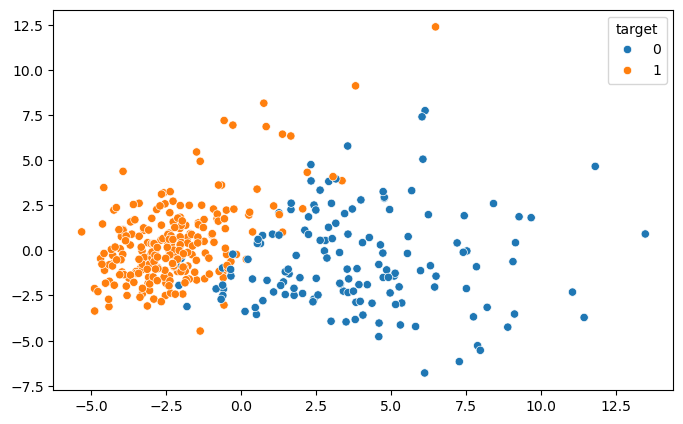

In [33]:
from sklearn.decomposition import PCA

# First, fit the transorm. 
pca = PCA().fit(X_train)

# Then, apply the transformed PCA to the data.
X_trans_pca = pca.transform(X_train)

# Now, plot.
fig = plt.figure(figsize = (8, 8 / 1.618))
sns.scatterplot(x=X_trans_pca[:,0], y=X_trans_pca[:,1], hue=y_train)

# Linear Discriminant Analysis 

LDA cross val score: 0.9578947368421054.


<Axes: >

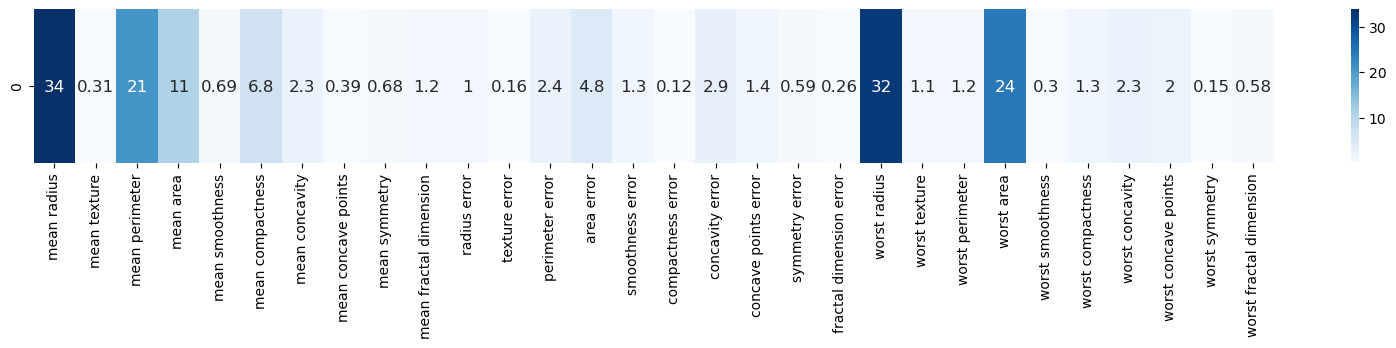

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.model_selection import cross_val_score

lda = LinearDiscriminantAnalysis()

# Cross Validation.
lda_cv_score = np.mean(cross_val_score(lda, X_train, y_train, cv=10))
print(f"LDA cross val score: {lda_cv_score}.")

# Now fit the model.
lda_model= lda.fit(X_train, y_train)

# Analyze the weights.
lda_weights_ = lda_model.coef_
lda_weights = pd.DataFrame(lda_weights_, columns=X.columns)

# Visualize weights w heatmap to check strength of weights.
fig = plt.figure(figsize=(20, 2));
sns.heatmap(lda_weights.abs(), annot=True, cmap="Blues", annot_kws={"size": 12})

## Classification Report

In [35]:
from sklearn.metrics import classification_report  

# Target names correspond to the "mask" we would like to use on the numerically-based classes,
# which in this case are 0 and 1. 0 is Malignant and 1 is Benign.
# This is important because classes are automatically identified in a 0-index order so 0 and 1 better appear
# in the test data and value "M" and "B" are the corresponding masks appearing in the 0-index order as 'target_names'.

lda_model_classification_report = classification_report(lda_model.predict(X_test), y_test, target_names=["M", "B"])
print(f"Classification Report {lda_model_classification_report}.")

Classification Report               precision    recall  f1-score   support

           M       0.89      0.98      0.93        63
           B       0.99      0.94      0.96       125

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.96      0.95      0.95       188
.


## Confusion Matrix

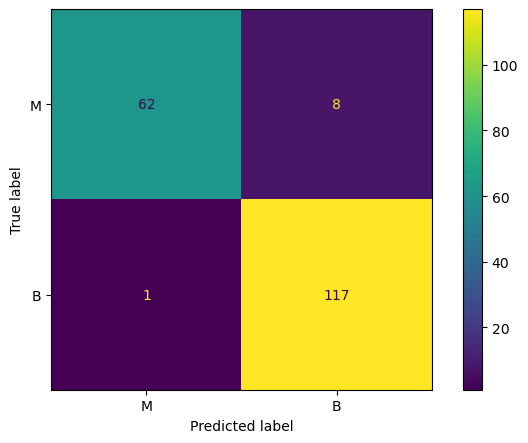

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize=(8, 8 / 1.618))

ConfusionMatrixDisplay.from_estimator(lda_model, X_test, y_test, display_labels=["M", "B"], ax=plt.subplot())



## ROC Curve, Precision and Recall

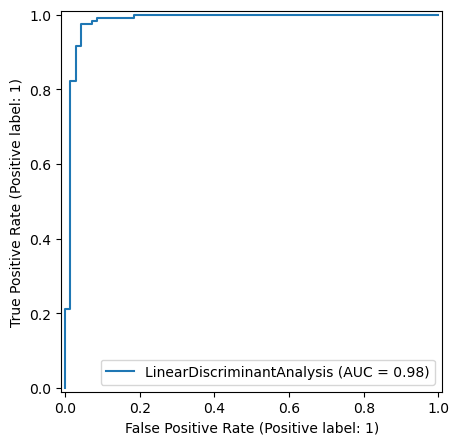

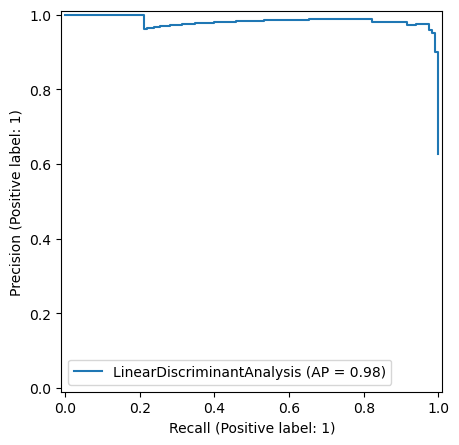

In [37]:
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(8, 8 / 1.618));
RocCurveDisplay.from_estimator(lda_model, X_test, y_test, ax=plt.subplot())


from sklearn.metrics import PrecisionRecallDisplay
fig = plt.figure(figsize = (8, 8 / 1.618))
PrecisionRecallDisplay.from_estimator(lda_model, X_test, y_test, ax=plt.subplot())

# Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB  

naive_bayes = GaussianNB()

# Get the Cross Val Score
naive_bayes_cv_score = cross_val_score(naive_bayes, X_train, y_train, cv=10)
print(f"Naive Bayes Mean CV Scoare {np.mean(naive_bayes_cv_score)}.")

# If we trust this model with this CV score as is, we can proceed to training. 
naive_bayes_model = GaussianNB().fit(X_train, y_train)

# Theta is means of each feature per class. Remember there are 2 classes and 30 features...
naive_bayes_theta = naive_bayes_model.theta_
means = pd.DataFrame(naive_bayes_theta, columns = X.columns)
means

Naive Bayes Mean CV Scoare 0.9369095816464237.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.963881,0.503232,0.979951,0.948926,0.472415,0.785542,0.889392,1.010824,0.427371,-0.030987,...,1.012176,0.576236,1.020561,0.961885,0.550258,0.797896,0.874856,1.042747,0.573730,0.440867
1,-0.572682,-0.298991,-0.582230,-0.563797,-0.280682,-0.466723,-0.528425,-0.600573,-0.253919,0.018411,...,-0.601376,-0.342366,-0.606359,-0.571496,-0.326931,-0.474064,-0.519789,-0.619540,-0.340877,-0.261938


## Classification Report

In [ ]:
# Now go and do Classification Report

from sklearn.metrics import classification_report
naive_bayes_classification_report = classification_report(naive_bayes_model.predict(X_test), y_test, target_names=["M", "B"])
print(naive_bayes_classification_report)

              precision    recall  f1-score   support

           M       0.89      0.95      0.92        65
           B       0.97      0.93      0.95       123

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



## Confusion Matrix

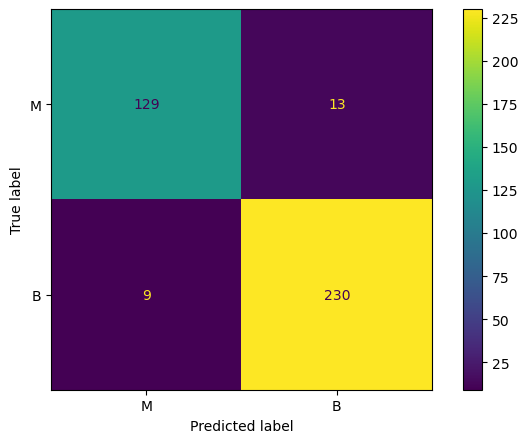

In [64]:
plt.figure(figsize=(8, 8 / 1.618));
ConfusionMatrixDisplay.from_estimator(
    naive_bayes_model, X_train, y_train, 
    display_labels=["M" , "B"],
    ax=plt.subplot(), 
)

## ROC Curve  (Receiver Opearating Characteristic)

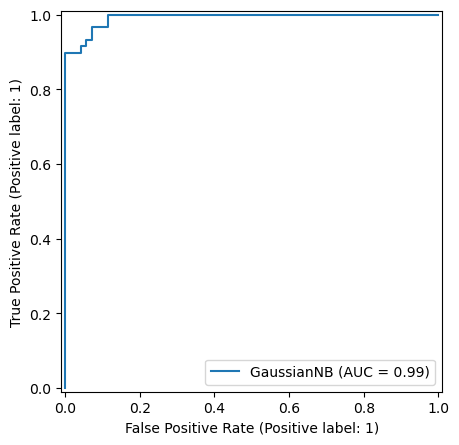

In [68]:
plt.figure(figsize=(8, 8 / 1.618));
RocCurveDisplay.from_estimator(naive_bayes_model, X_test, y_test, ax=plt.subplot())

## Precision Recall

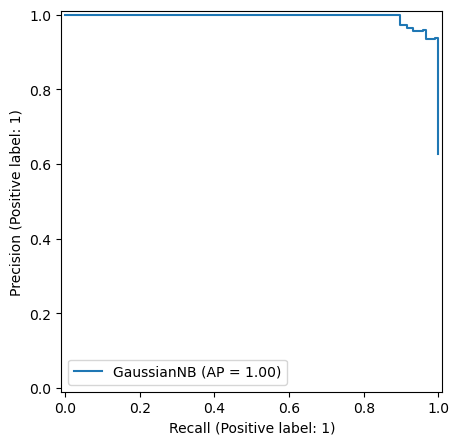

In [74]:
plt.figure(figsize=(8, 8 / 1.618));
PrecisionRecallDisplay.from_estimator(naive_bayes_model, X_test, y_test, ax=plt.subplot())